# Routines to compate PYPIT with LowRedux

In [15]:
%matplotlib inline

In [33]:
# imports
from linetools.spectra import io as lsio
from linetools.spectra.xspectrum1d import XSpectrum1D
# 
import matplotlib as mpl
mpl.rcParams['font.family'] = 'stixgeneral'
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

## Filenames

### LowRedux

In [2]:
scifile = '/Users/xavier/PYPIT/Kast_red/Science/sci-r153.fits.gz'

In [3]:
lrdx_scihdu = fits.open(scifile)

### PYPIT

In [27]:
boxfile = '/Users/xavier/PYPIT/TEST_SUITES/Kast_red/MasterFrames/J0025-0312_000_boxcar.fits'

## Compare Boxcar Spectra

In [28]:
# Read/Load
pypit_boxspec = lsio.readspec(boxfile)
# Read LowRedux
sciobj = Table(lrdx_scihdu[5].data)[0] # Might have to deal with more than one obj
sig = np.sqrt(sciobj['MASK_BOX']/(sciobj['SIVAR_BOX'] + (sciobj['MASK_BOX']==0)))
lwrdx_boxspec = XSpectrum1D.from_tuple( (sciobj['WAVE_BOX'], sciobj['FLUX_BOX'], sig) )

### Quick plot of the spectra

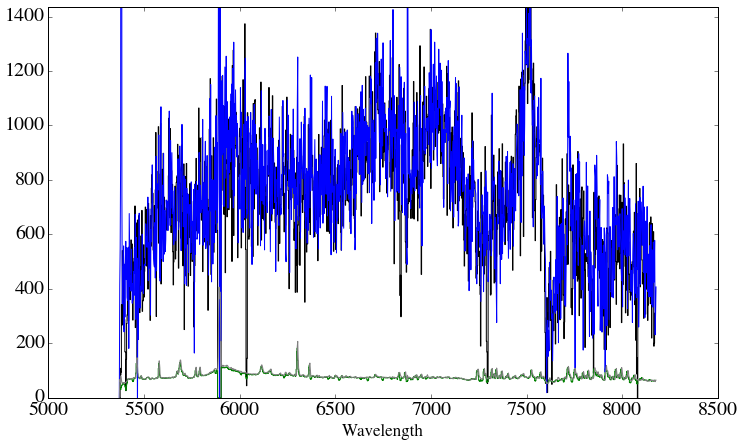

In [35]:
plt.clf()
plt.figure(figsize=(12,7))
ax = plt.gca()
ymax = np.median(pypit_boxspec.flux)*2.
# PYPIT
ax.plot(pypit_boxspec.dispersion, pypit_boxspec.flux, 'k-', drawstyle='steps')
ax.plot(pypit_boxspec.dispersion, pypit_boxspec.sig, 'g-', drawstyle='steps')
# LowRedux
ax.plot(lwrdx_boxspec.dispersion, lwrdx_boxspec.flux, '-', color='blue')
ax.plot(lwrdx_boxspec.dispersion, lwrdx_boxspec.sig, '-', color='gray')
# Axes
ax.set_ylim(0.,ymax)
ax.set_xlabel('Wavelength',fontsize=17.)
# Finish
plt.show()
plt.close()
#

### S/N

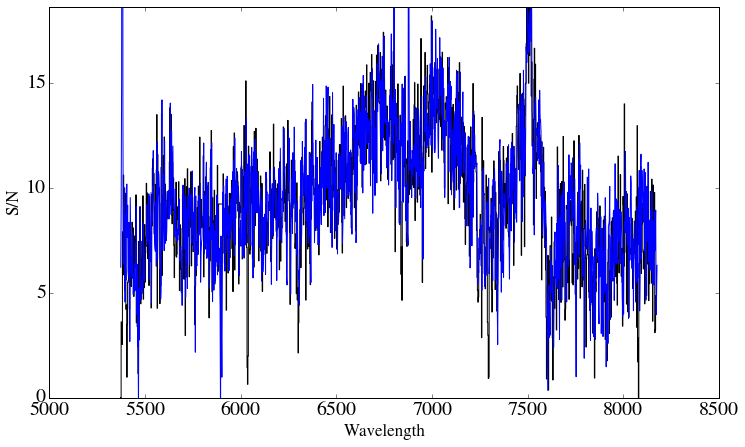

In [34]:
plt.clf()
plt.figure(figsize=(12,7))
ax = plt.gca()
ymax = np.median(pypit_boxspec.flux)*2.
# PYPIT
gdpy = pypit_boxspec.sig > 0.
pys2n =  pypit_boxspec.flux[gdpy]/pypit_boxspec.sig[gdpy]
ax.plot(pypit_boxspec.dispersion[gdpy],pys2n, 'k-', drawstyle='steps')
# LowRedux
gdlx = lwrdx_boxspec.sig > 0.
ax.plot(lwrdx_boxspec.dispersion[gdlx], lwrdx_boxspec.flux[gdlx]/lwrdx_boxspec.sig[gdlx], '-', color='blue')
# Axes
ax.set_ylim(0.,np.median(pys2n)*2.)
ax.set_xlabel('Wavelength',fontsize=17.)
ax.set_ylabel('S/N',fontsize=17.)
# Finish
plt.show()
plt.close()
#

In [21]:
sciobj

OBJID,SLITID,XFRACPOS,PEAKFLUX,MASKWIDTH,FWHM,FLX_SHFT_WAV,FLX_SHFT_SPA,FWHMFIT [1200],XPOS [1200],YPOS [1200],HAND_AP,HAND_X,HAND_Y,HAND_MINX,HAND_MAXX,HAND_FWHM,HAND_SUB,WAVE_OPT [1200],FLUX_OPT [1200],SIVAR_OPT [1200],IVAR_OPT [1200],SKY_OPT [1200],RN_OPT [1200],NIVAR_OPT [1200],MASK_OPT [1200],FRAC_USE [1200],CHI2 [1200],WAVE_BOX [1200],FLUX_BOX [1200],SIVAR_BOX [1200],IVAR_BOX [1200],NIVAR_BOX [1200],SKY_BOX [1200],RN_BOX [1200],MASK_BOX [1200],MINCOL,MAXCOL,BOX_RAD,ARC_FWHM_FIT [1200],ARC_FWHM_MED,PIX_RES,BINNING [2]
int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,float32,float32,int32,float64,float32,float32,float32,float32,float32,float32,uint8,float32,float32,float64,float32,float32,float32,float32,float32,float32,uint8,int32,int32,int16,float32,float64,float64,int32
1,1,0.470201,112.505,15.48,3.48127,0.12,0.0,3.59091 .. 3.65211,129.38 .. 133.111,0.0 .. 1199.0,0,0.0,0.0,0.0,0.0,0.0,0,5370.24173801 .. 8175.58889084,0.0 .. 359.202,0.0 .. 0.000510373,0.0 .. 0.000510373,0.0 .. 671.115,0.0 .. 14.6393,0.0 .. 0.000508439,0 .. 1,0.0 .. 0.999995,0.0 .. 3.85025,5370.24145247 .. 8175.58845694,-0.0 .. 406.755,0.0 .. 0.000240908,0.0 .. 0.000240908,0.0 .. 0.000240908,2252.3 .. 1577.65,22.4499 .. 22.4499,0 .. 1,103,159,7,1.41926 .. 1.26241,1.52592325211,nan,0 .. 0


In [25]:
lwrdx_boxspec.sig

array([  0.        ,  66.2328186 ,  59.1825943 , ...,  58.40088272,
        62.96261215,  64.42795563], dtype=float32)

In [26]:
xdb.xpcol(lwrdx_boxspec.sig, pypit_boxspec.sig)

0.0     16.9976581659
66.2328 16.2055717268
59.1826 14.7070692745
56.4447 14.785585058 
79.3563 14.8803994079
67.5464 14.395030568 
54.4663 14.3900300132
53.9985 14.1102056494
52.7381 14.7146936674
53.5124 15.310080977 
55.6966 14.8629656663
53.0032 15.9147294563
56.3489 14.9863367764
52.8006 15.2537499631
55.8152 15.412599595 
56.3919 15.2454243523
56.9978 16.4616899779
60.0031 16.5468540238
60.7978 17.2599779344
62.1885 18.258128665 
65.7069 19.1043726435
70.6618 18.5911373033
67.5032 19.2927284581
70.8897 19.0440842903
69.3777 18.7505433351
67.9855 18.8425325973
68.6862 18.8634717699
68.7927 19.2152370459
69.3567 19.3363572087
70.9494 19.3378705553
70.5962 19.7783733686
71.0091 19.6850921677
70.8651 19.9469868062
72.9318 20.4434091122
73.5277 20.3960249195
74.5324 20.1821032463
73.2589 20.1948308415
73.9066 19.9608794905
72.6379 24.9546900742
92.6527 34.8354122966
133.452 37.7324837245
146.766 30.8991359778
117.114 24.3201831697
90.4914 21.0345850906
77.4778 20.6188040744
75.8037 20

IndexError: index 1199 is out of bounds for axis 0 with size 1199